In [10]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plot 
import matplotlib
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Import

In [2]:
matplotlib.rcParams['figure.figsize'] =(20,10)

In [3]:
df1 = pd.read_csv('kc_house_data.csv')
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Exploratory Data Analysis

In [4]:
df1.shape

(21597, 21)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df1.groupby('zipcode')['sqft_living'].agg('count').head(10)

zipcode
98001    361
98002    199
98003    280
98004    317
98005    168
98006    498
98007    141
98008    283
98010    100
98011    195
Name: sqft_living, dtype: int64

In [21]:
df2 = df1.drop(['sqft_lot15', 'id', 'sqft_living15','long','lat'], axis = 'columns')

In [22]:
df2 = df2.rename(columns = {'date' : 'sell_date', 'condition':'overall_condition'})

In [24]:
df2.head()

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074


In [25]:
df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,yr_built,yr_renovated,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000


# Data Cleaning

<AxesSubplot:>

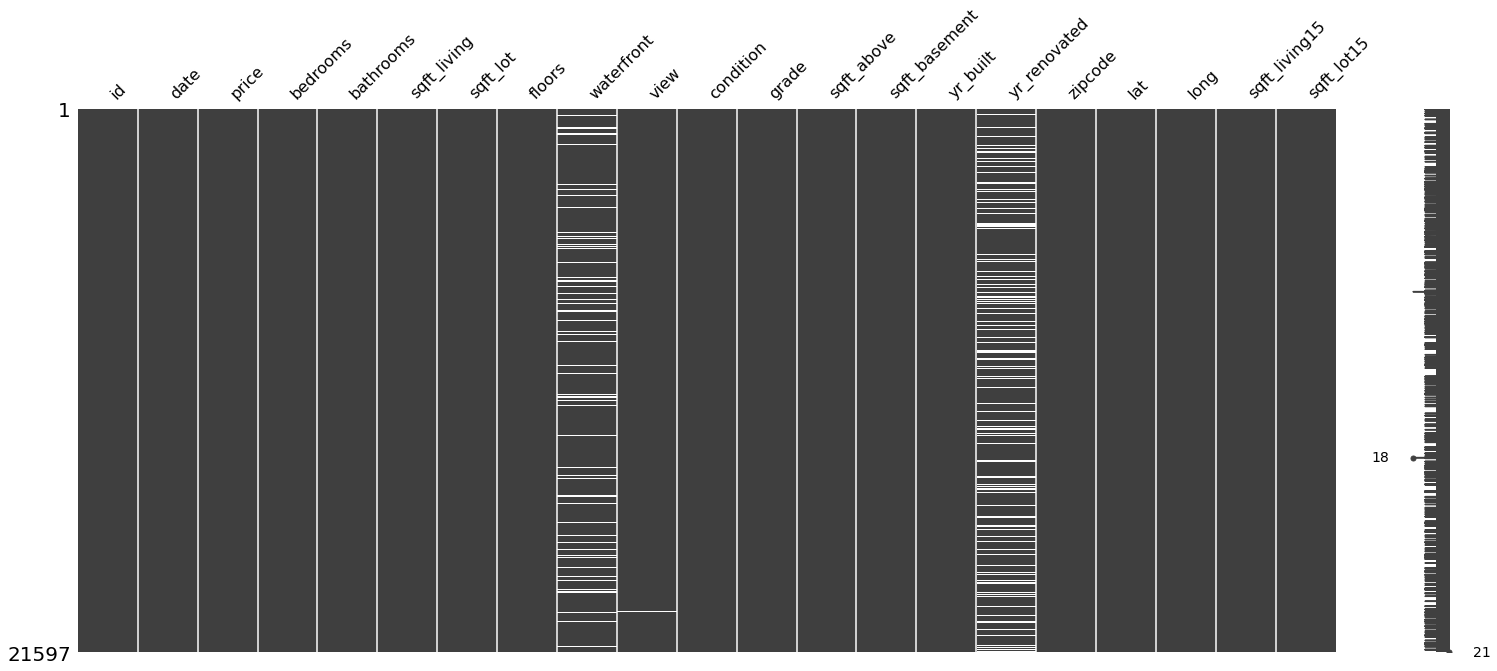

In [11]:
msno.matrix(df1)

In [26]:
df2.isnull().sum()

sell_date               0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront           2376
view                   63
overall_condition       0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated         3842
zipcode                 0
dtype: int64

Most nulls are on waterfront and yr_renovated. This is acceptable, since not all houses are renovated or are on the waterfront. 

In [34]:
df2['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [35]:
df2['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [38]:
df2['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [44]:
#outlier value of 33 bedrooms in a small house
df2[df2['bedrooms']>20]

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode


In [41]:
# Change 33 bedrooms to 3 bedrooms.
df2['bedrooms'].replace(to_replace=33, value=3, inplace=True)

## Check for Correct Data Type

In [45]:
def is_float(x):
    try:
        float(x)
    except:
        return False 
    return True

In [46]:
#sqft_living area is a float
df2[df2['sqft_living'].apply(is_float)]

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027


In [47]:
#no floats for sqft living
df2[~df2['sqft_living'].apply(is_float)]

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode


In [48]:
df2[df2['price'].apply(is_float)]

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027


In [49]:
df2[~df2['price'].apply(is_float)]

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode


# Feature Engineering

In [50]:
df3 = df2.copy()

In [51]:
df3.head()

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074


In [66]:
df3['price_per_sqft'] =  df3['price'] / df3['sqft_living'] 

In [67]:
df3['price_per_sqft_lot'] =  df3['price'] / df3['sqft_lot']

In [68]:
df3.head()

,sell_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,overall_condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price_per_sqft,price_per_sqft_lot
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,188.050847,2546.191978
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,209.338521,1346.096654
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,233.766234,5555.555556
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,308.163265,827.814570
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,303.571429,1584.313725


In [69]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sell_date           21597 non-null  object 
 1   price               21597 non-null  float64
 2   bedrooms            21597 non-null  int64  
 3   bathrooms           21597 non-null  float64
 4   sqft_living         21597 non-null  int64  
 5   sqft_lot            21597 non-null  int64  
 6   floors              21597 non-null  float64
 7   waterfront          19221 non-null  float64
 8   view                21534 non-null  float64
 9   overall_condition   21597 non-null  int64  
 10  grade               21597 non-null  int64  
 11  sqft_above          21597 non-null  int64  
 12  sqft_basement       21597 non-null  object 
 13  yr_built            21597 non-null  int64  
 14  yr_renovated        17755 non-null  float64
 15  zipcode             21597 non-null  int64  
 16  pric

is there a dimensionality issue here? 

In [72]:
location_stats = df3.groupby('zipcode')['zipcode'].agg('count').sort_values(ascending = False)

In [73]:
location_stats

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [75]:
len(location_stats[location_stats<=200])

18

No dimensionality problem

In [76]:
df3.price_per_sqft.describe()

count    21597.000000
mean       264.143368
std        110.000061
min         87.588235
25%        182.291667
50%        244.644550
75%        318.333333
max        810.138889
Name: price_per_sqft, dtype: float64

# Remove Outliers